In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv(r"DATA\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sort_values(ascending = False)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<!-- ## convert half numeric to complete numeric  -->

In [7]:
# df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors = 'coerce')
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
# df.drop('customerID', axis = 1, inplace = True)

In [8]:
# df[['MonthlyCharges','TotalCharges']].isnull().sum()

In [9]:
# df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [10]:
# df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [11]:
# num_col = df.select_dtypes(include = ['int64','float'])
# cat_col = df.select_dtypes(include = ['object'])

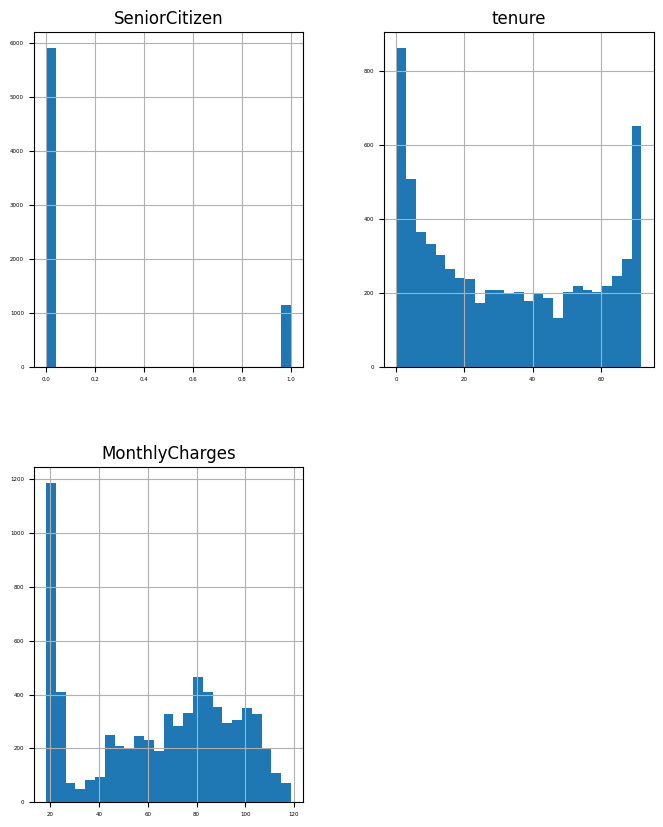

In [12]:
df_num = df.select_dtypes(include = ('float', 'int64'))
df_num.hist(figsize = (8,10), bins = 25, xlabelsize = 4, ylabelsize = 4)
plt.show()

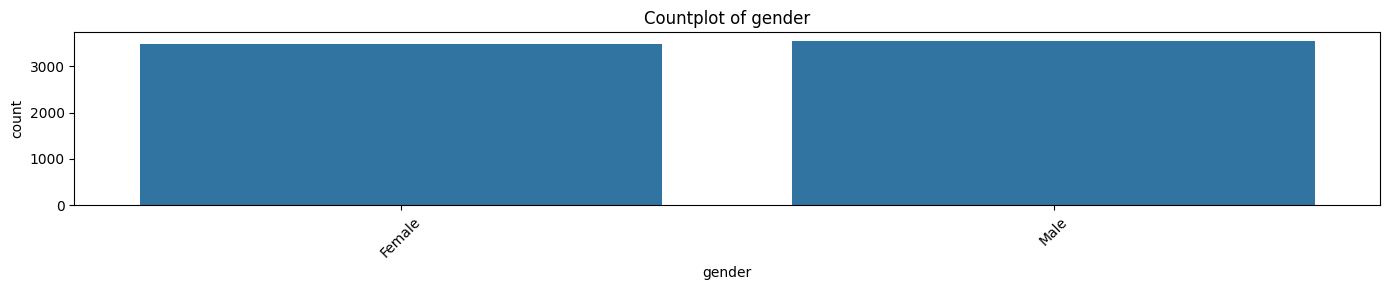

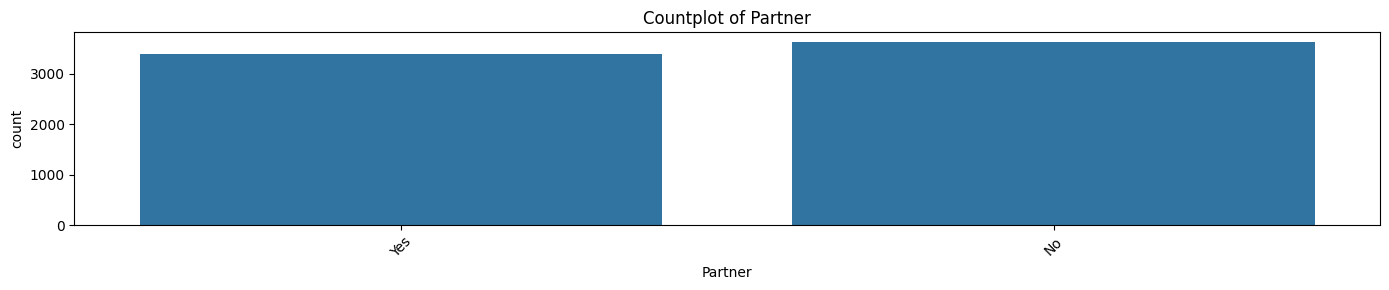

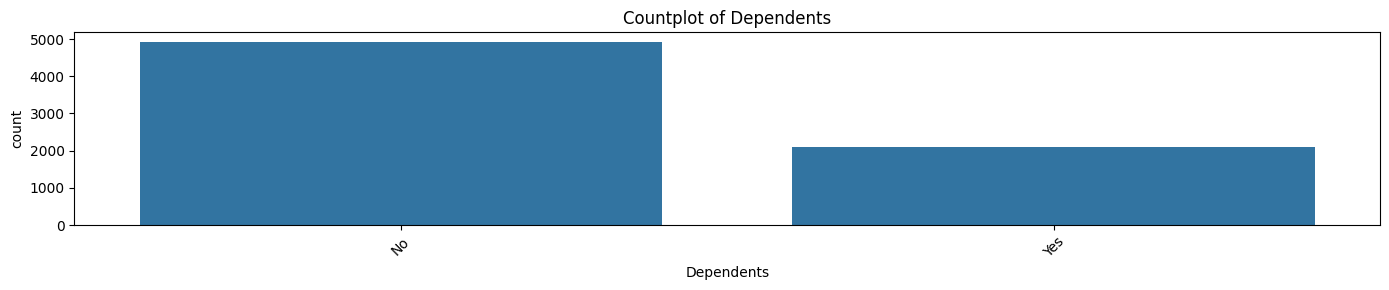

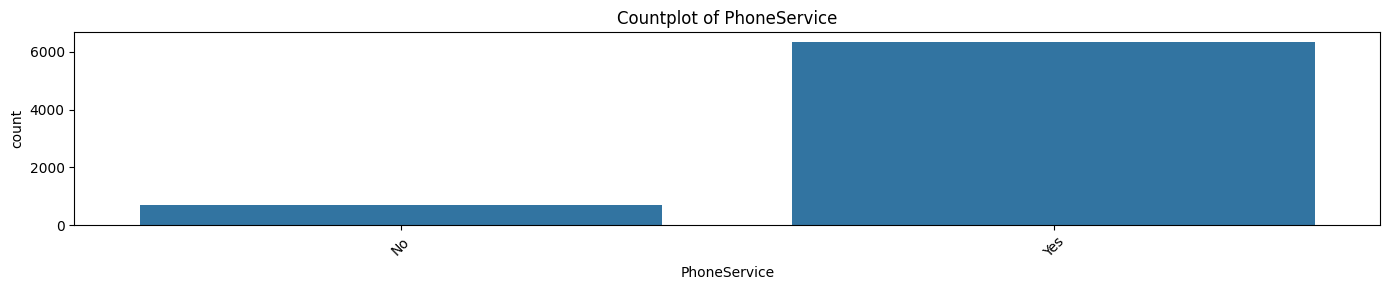

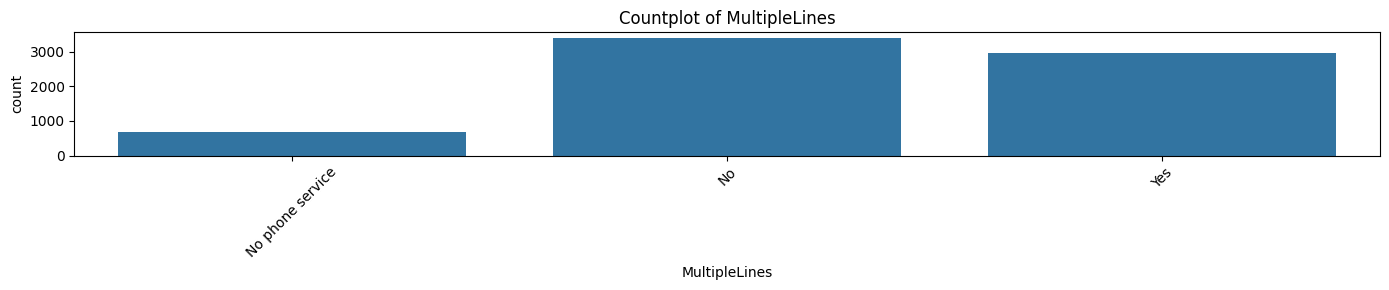

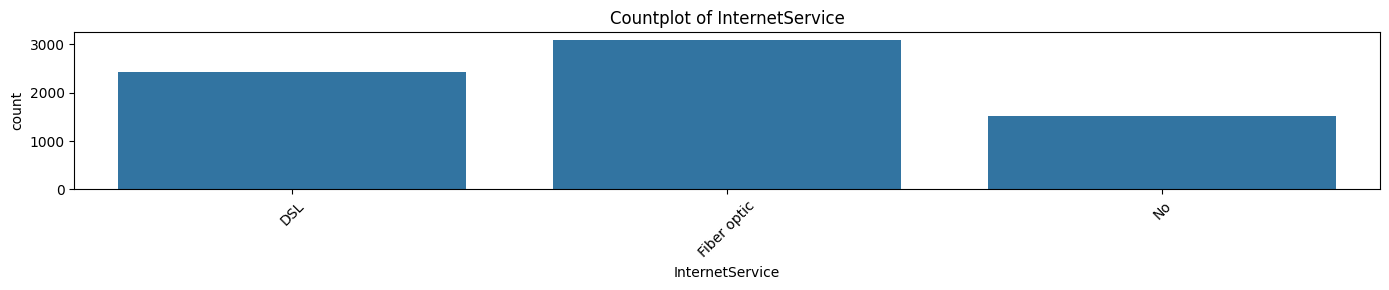

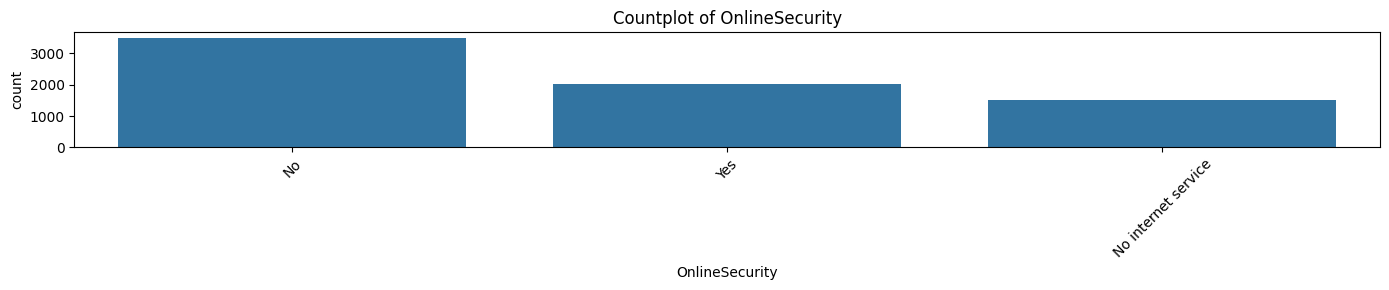

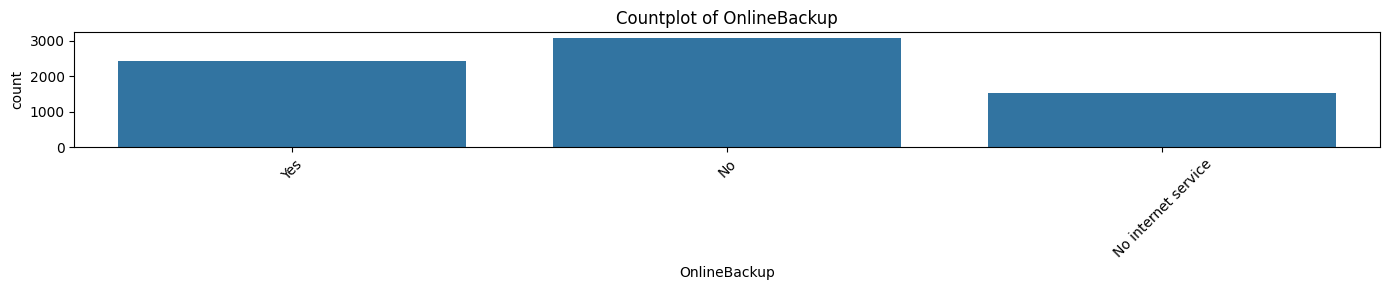

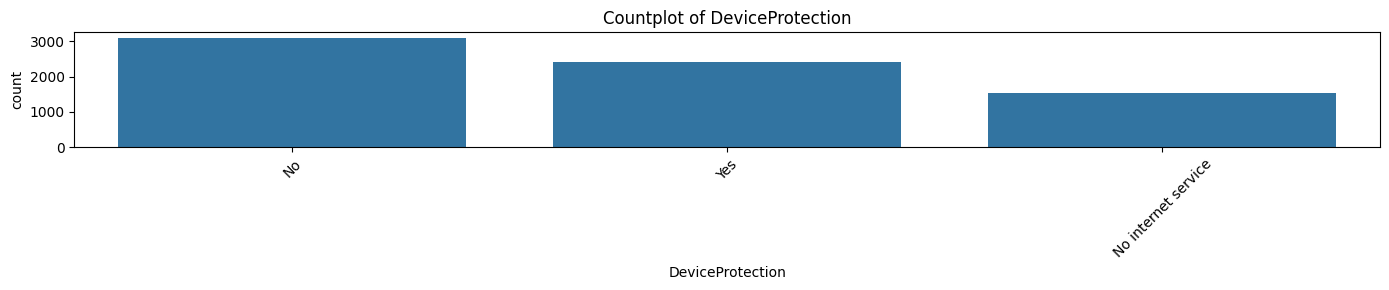

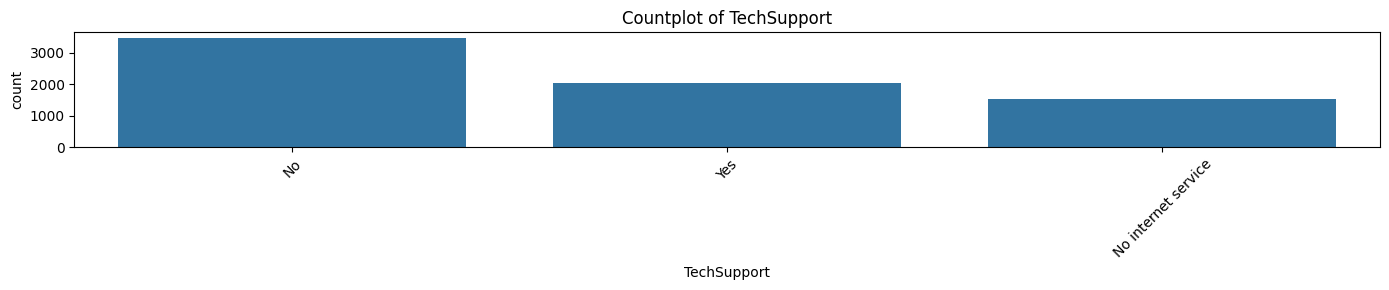

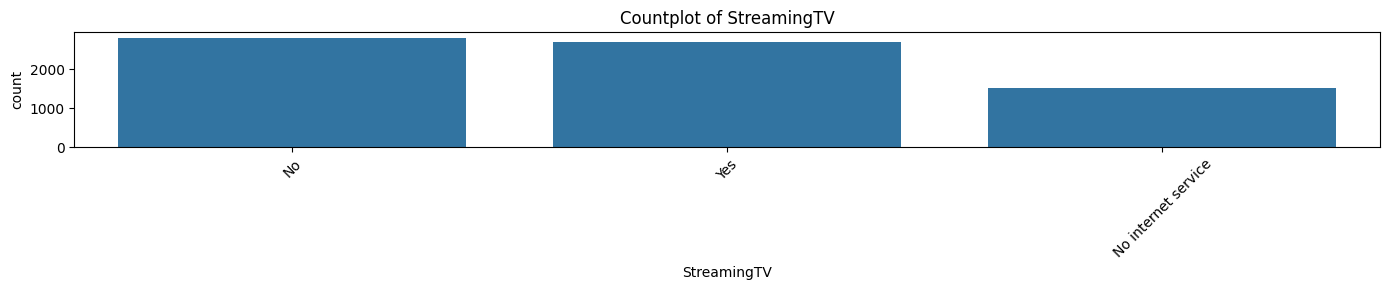

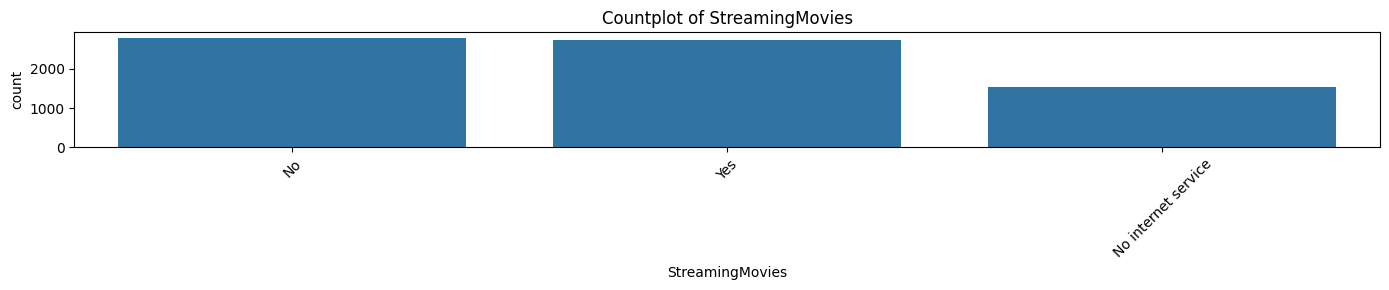

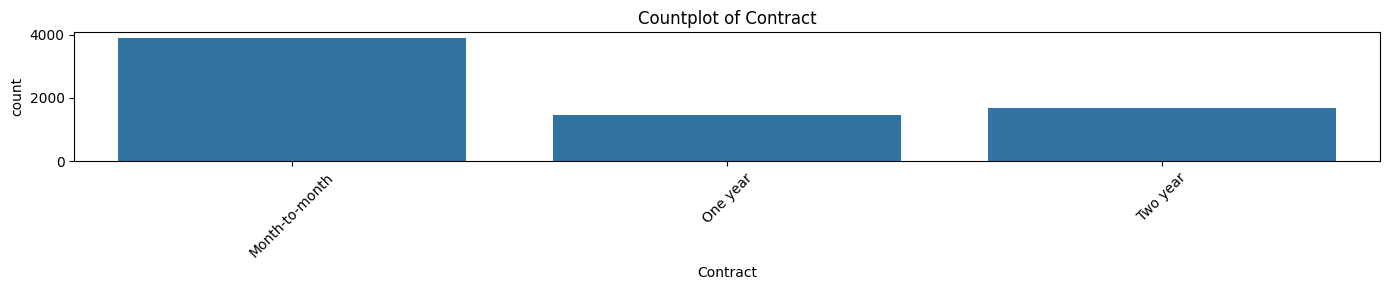

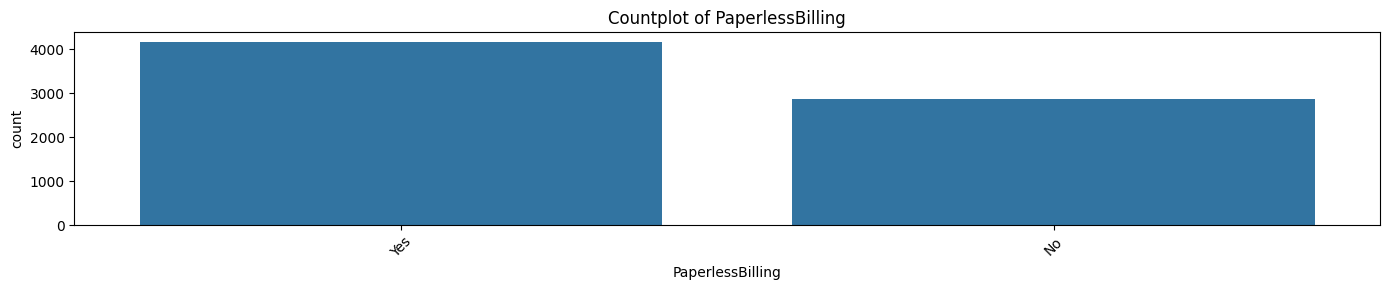

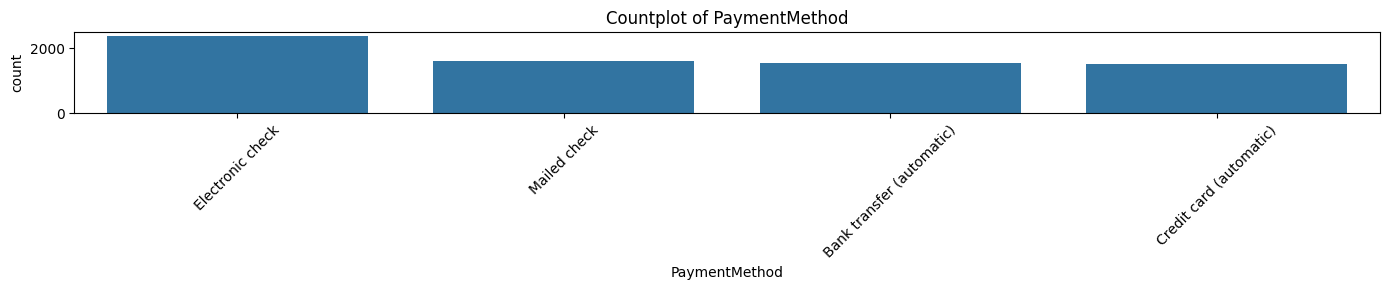

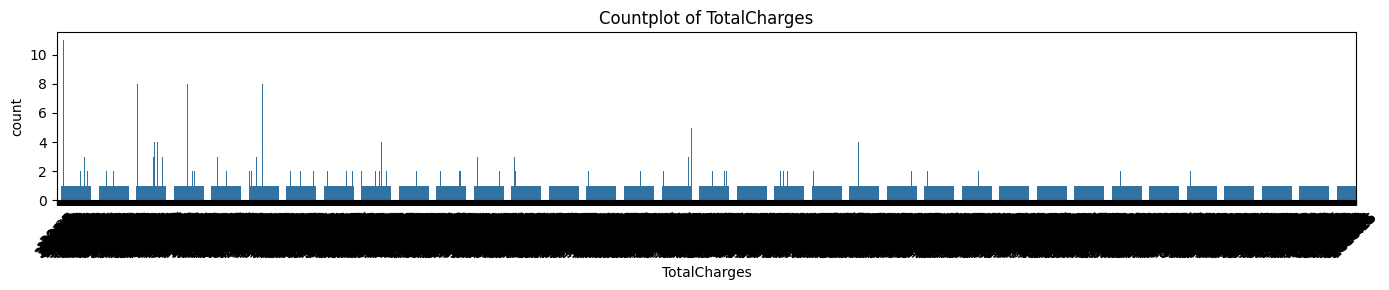

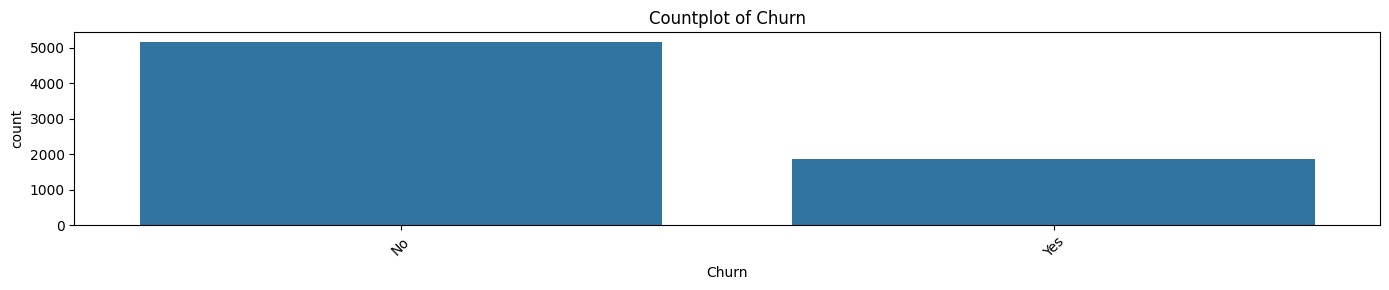

In [13]:
df.drop('customerID', axis = 1, inplace = True)

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(14, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df[['MonthlyCharges','TotalCharges']].isnull().sum()

MonthlyCharges    0
TotalCharges      0
dtype: int64

In [18]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [19]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

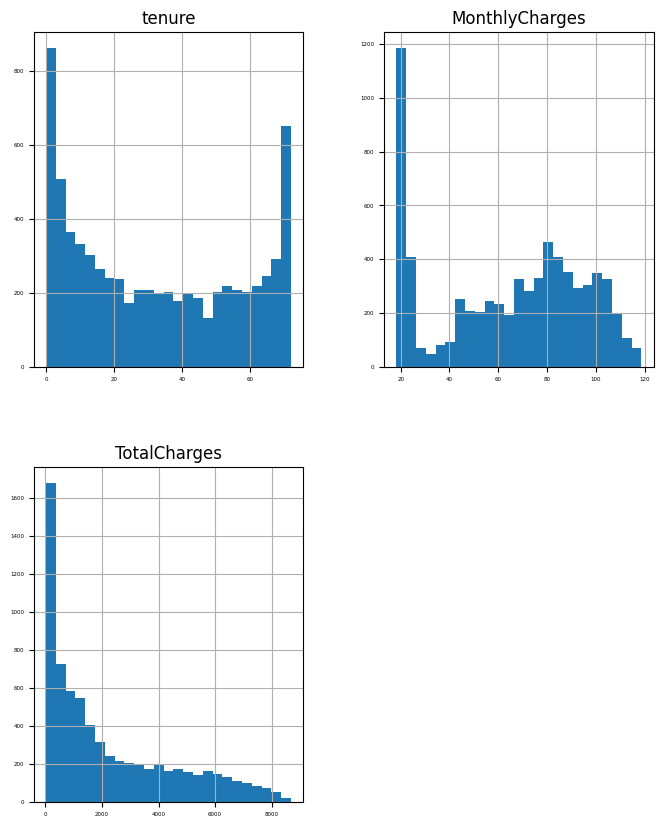

In [20]:
df_numb = df.select_dtypes(include = ('float', 'int64'))
df_numb.hist(figsize = (8,10), bins = 25, xlabelsize = 4, ylabelsize = 4)
plt.show()

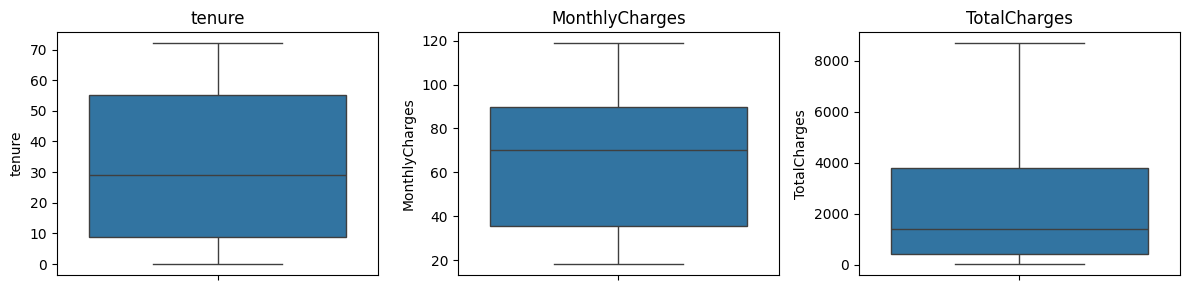

In [21]:
plt.figure(figsize=(12,3))
for i,col in enumerate(df_numb,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS 

### NUMERIC VS NUMERIC

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


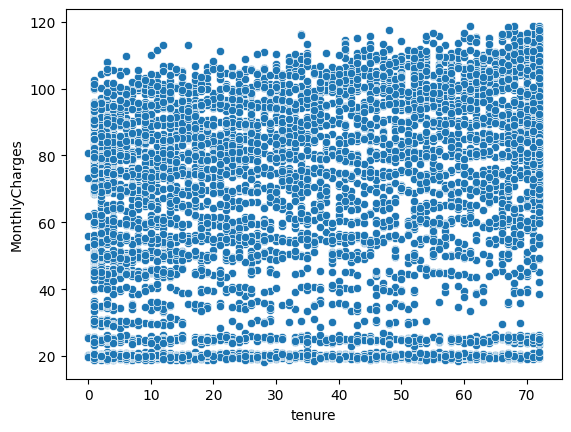

In [22]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)
df[['tenure', 'MonthlyCharges']].corr()

,tenure,TotalCharges
tenure,1.000000,0.825464
TotalCharges,0.825464,1.000000


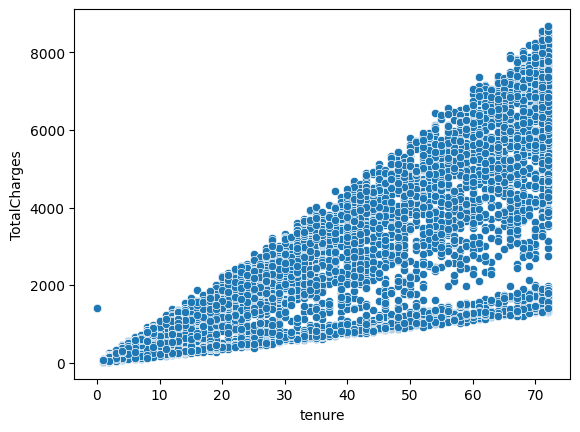

In [23]:
sns.scatterplot(x='tenure', y='TotalCharges', data=df)
df[['tenure', 'TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.650864
TotalCharges,0.650864,1.000000


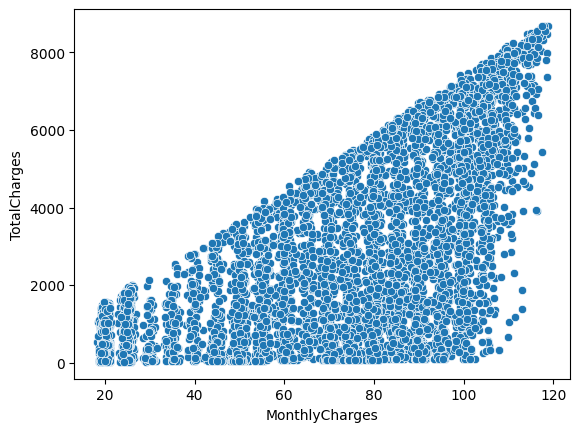

In [24]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
df[['MonthlyCharges', 'TotalCharges']].corr()

# NUMERIC vs TARGET

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

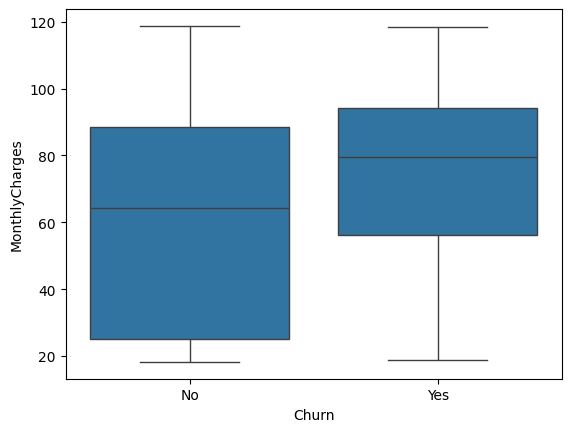

In [25]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

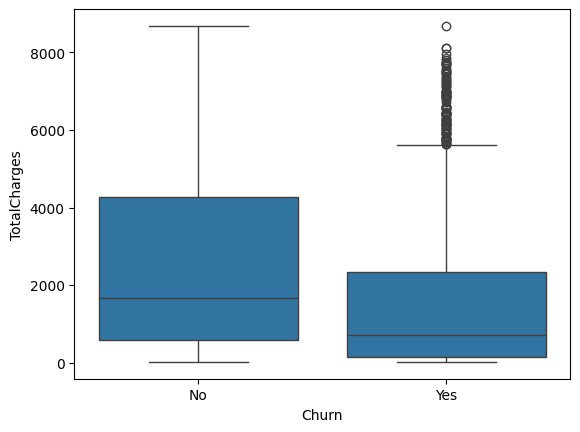

In [26]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

<Axes: xlabel='Churn', ylabel='tenure'>

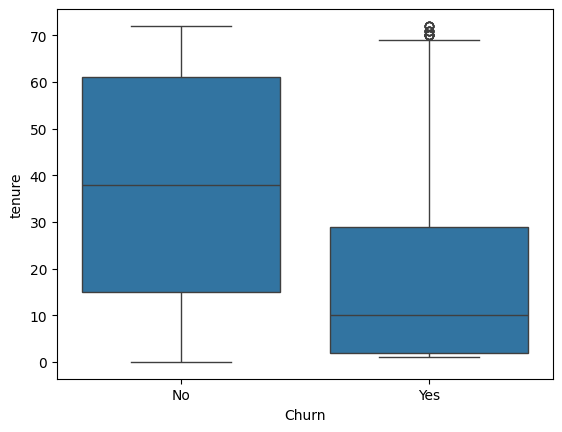

In [27]:
sns.boxplot(x='Churn', y='tenure', data=df)

# Cat vs Target

Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


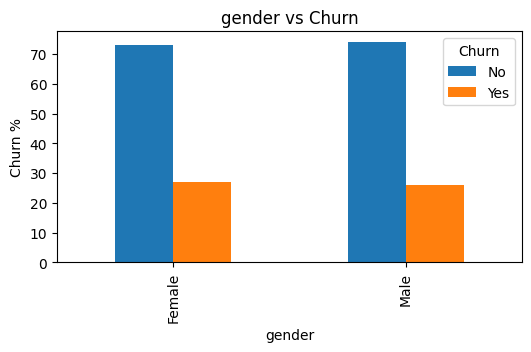

Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261


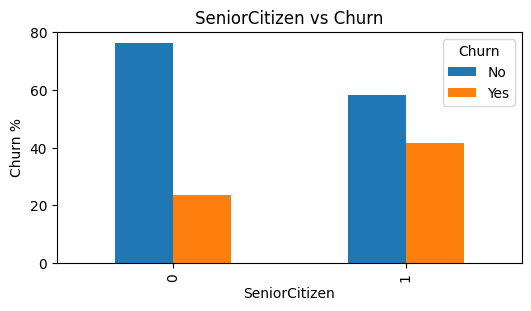

Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903


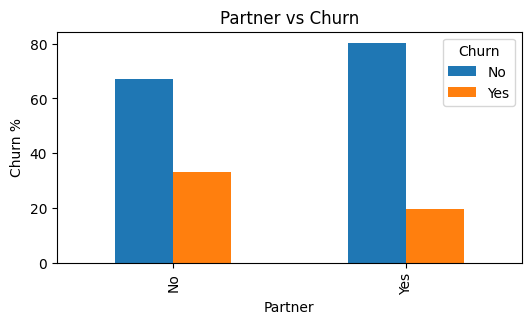

Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


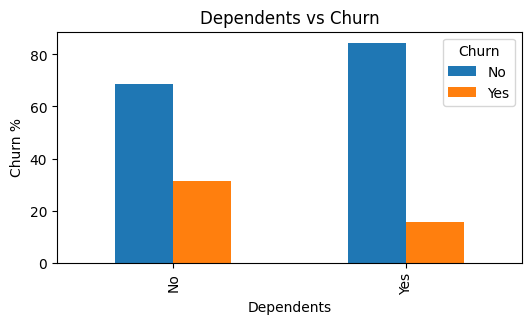

Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637


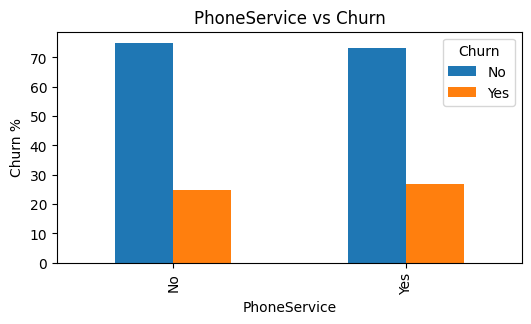

Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896


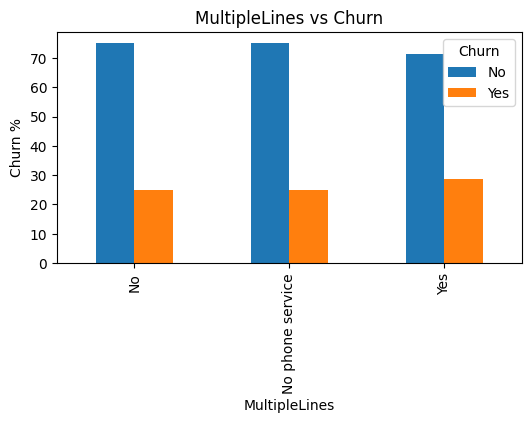

Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


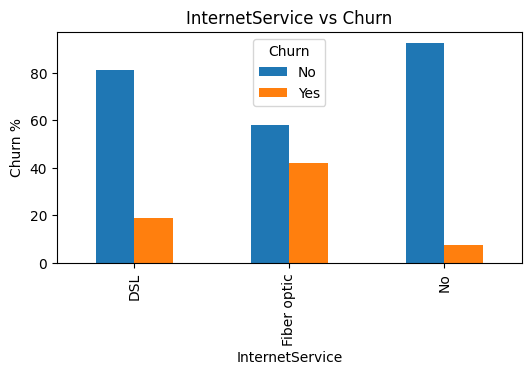

Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194


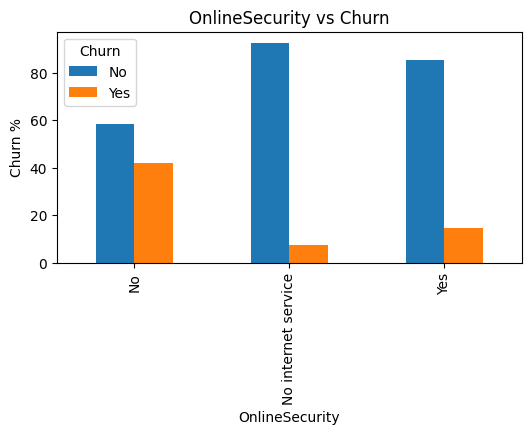

Churn                       No        Yes
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494


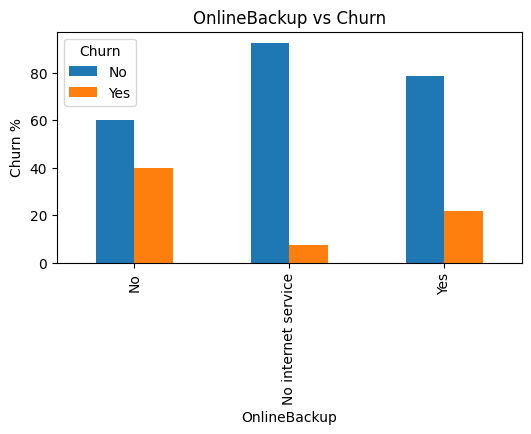

Churn                       No        Yes
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064


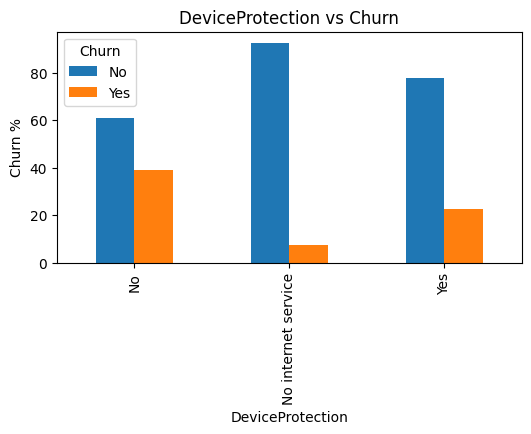

Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341


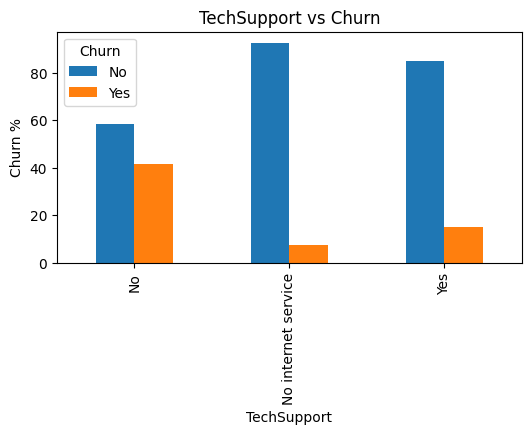

Churn                       No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188


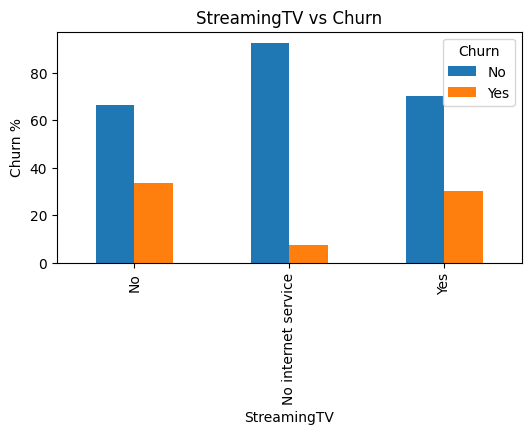

Churn                       No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435


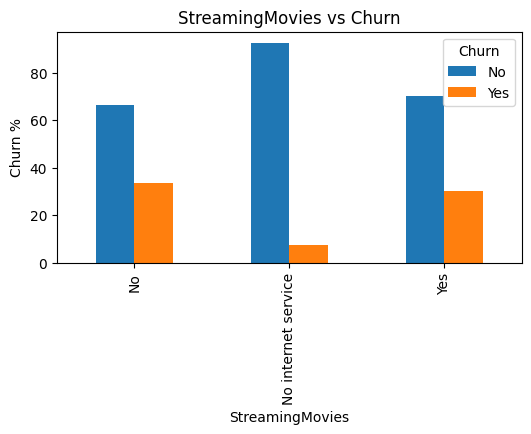

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


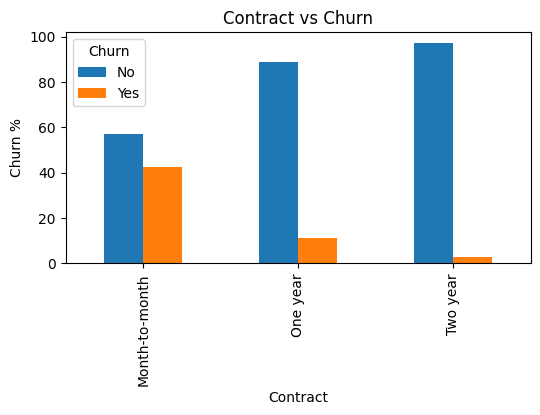

Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092


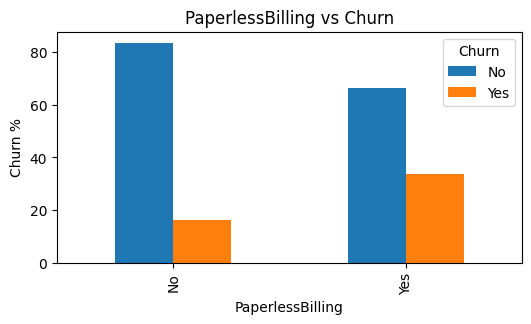

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


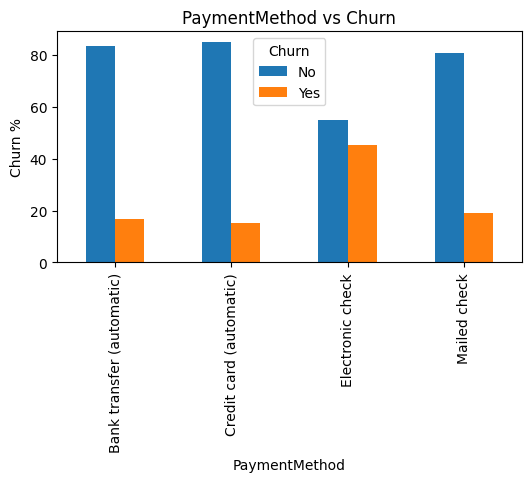

Churn     No    Yes
Churn              
No     100.0    0.0
Yes      0.0  100.0


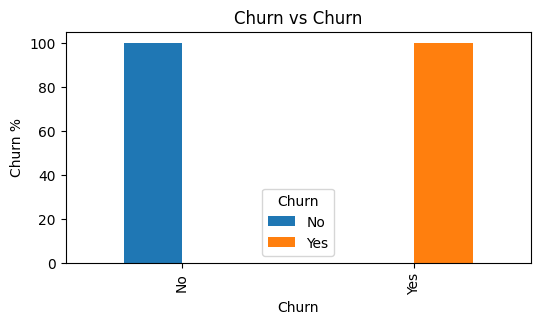

In [28]:
for col in df.select_dtypes(include = ['object', 'category']):
    churn_rate = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(churn_rate)
    churn_rate.plot(kind='bar', figsize=(6,3), title=f"{col} vs Churn")
    plt.ylabel("Churn %")
    plt.show()

# CORRELATION ANALYSIS 

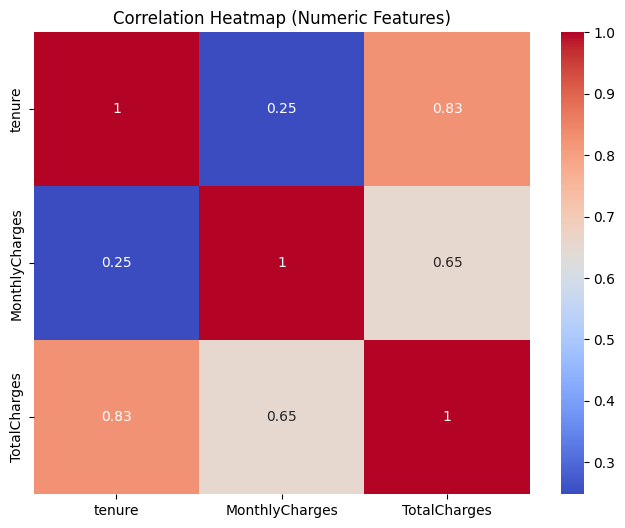

In [29]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [30]:
df.shape

(7043, 20)

In [31]:
df.to_csv("DATA/cleaned_churn.csv", index=False)

# SUMMARY TABLE 

#### shape before : 7043,21
#### shape after : 7043,20

## KEY FEATURES:
#### tenure → Customers with tenure < 12 months churn far more often.
#### Contract → Month-to-month contracts have highest churn; two-year almost none.
#### InternetService → Fiber optic users churn more than DSL users.
#### MonthlyCharges → Higher monthly charge correlates positively with churn.
#### SeniorCitizen → Slightly higher churn than non-seniors.
#### Gender → No clear impact on churn.

## OUTLIERS:
#### no extreme outliers 

## CLASS IMBALANCE
#### skewed to NO

### Dropped CustomerID

# saved as cleaed_churn.csv

In [32]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64